# <b>CS156 (Introduction to AI), Fall 2022</b>
# <u><b>Homework 3 submission</b></u>

### Roster Name: Preet LNU
### Student ID: 014755741
### Email address: preet.lnu@sjsu.edu


##  <u>References and sources </u>

https://www.kaggle.com/maajdl/yeh-concret-data 

Also referenced from file Regression.Boston.ipynb 

##  <u>Solution</u>

#### Load libraries and set random number generator seed

In [18]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

In [19]:
np.random.seed(42)

#### Code the solution

#### 1. Load the dataset. 

In [20]:
concrete_file = pd.read_csv(r'/content/homework3_input_data.csv')

In [21]:
df = pd.DataFrame(concrete_file, columns=concrete_file.columns)
df.head()
feature_names = ['cement', 'slag', 'flyash', 'water', 'superplasticizer', 'coarseaggregate', 'fineaggregate', 'age']
X = df[feature_names]
Y = df['csMPa']

In [22]:
print(df.columns)
df.describe()

Index(['cement', 'slag', 'flyash', 'water', 'superplasticizer',
       'coarseaggregate', 'fineaggregate', 'age', 'csMPa'],
      dtype='object')


,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


#### 2. Plot all independent variables vs. the dependent variable

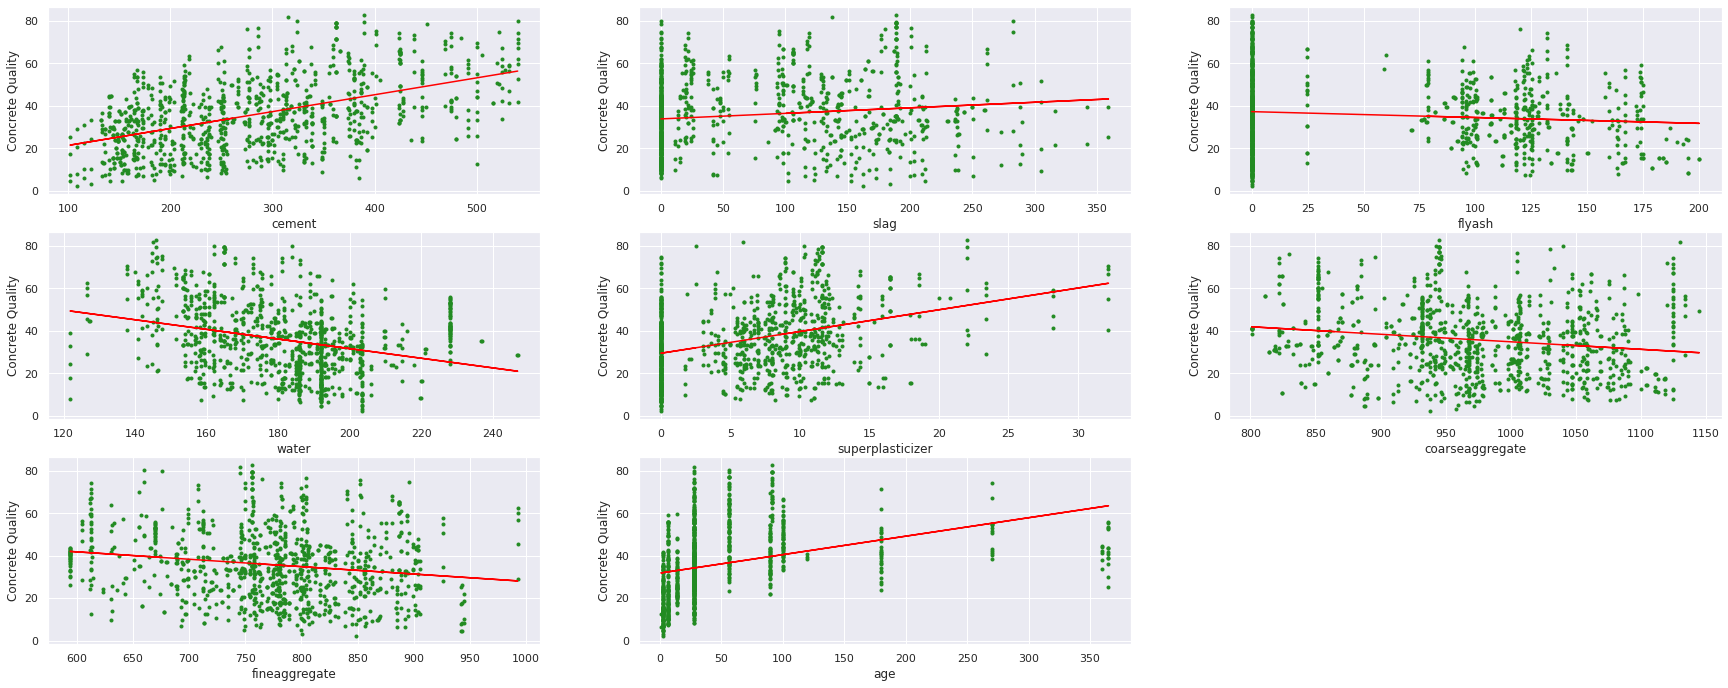

In [23]:
plt.figure(figsize=(30,20))
for i, col in enumerate(df.columns[0:8]):
    plt.subplot(5, 3, i+1)
    x = df[col]
    y = df['csMPa']
    plt.plot(x, y, '.', color="forestgreen")
    m, b = np.polyfit(x, y, 1)
    plt.plot(x, m*x + b, color="red")
    plt.xlabel(col)
    plt.ylabel('Concrete Quality')

#### 3. Compute and plot a correlation matrix between the independent variables

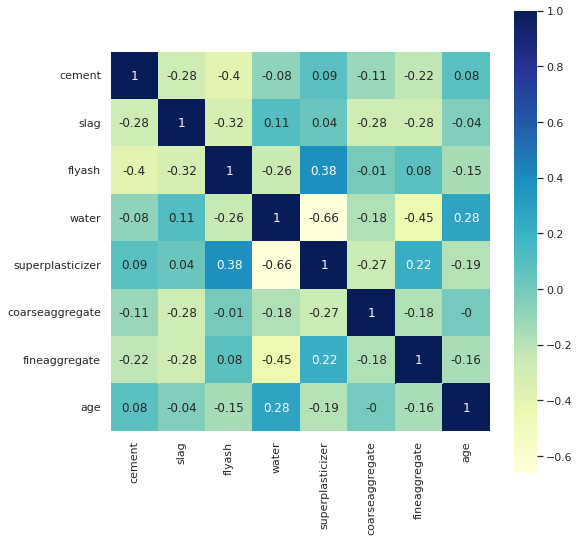

In [24]:
features = df[feature_names]
sns.set(rc={'figure.figsize': (8.5,8.5)})
sns.heatmap(features.corr().round(2), square=True, cmap='YlGnBu', annot=True)

#### 4. Break the data into the training and test datasets


In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((824, 8), (824,), (206, 8), (206,))

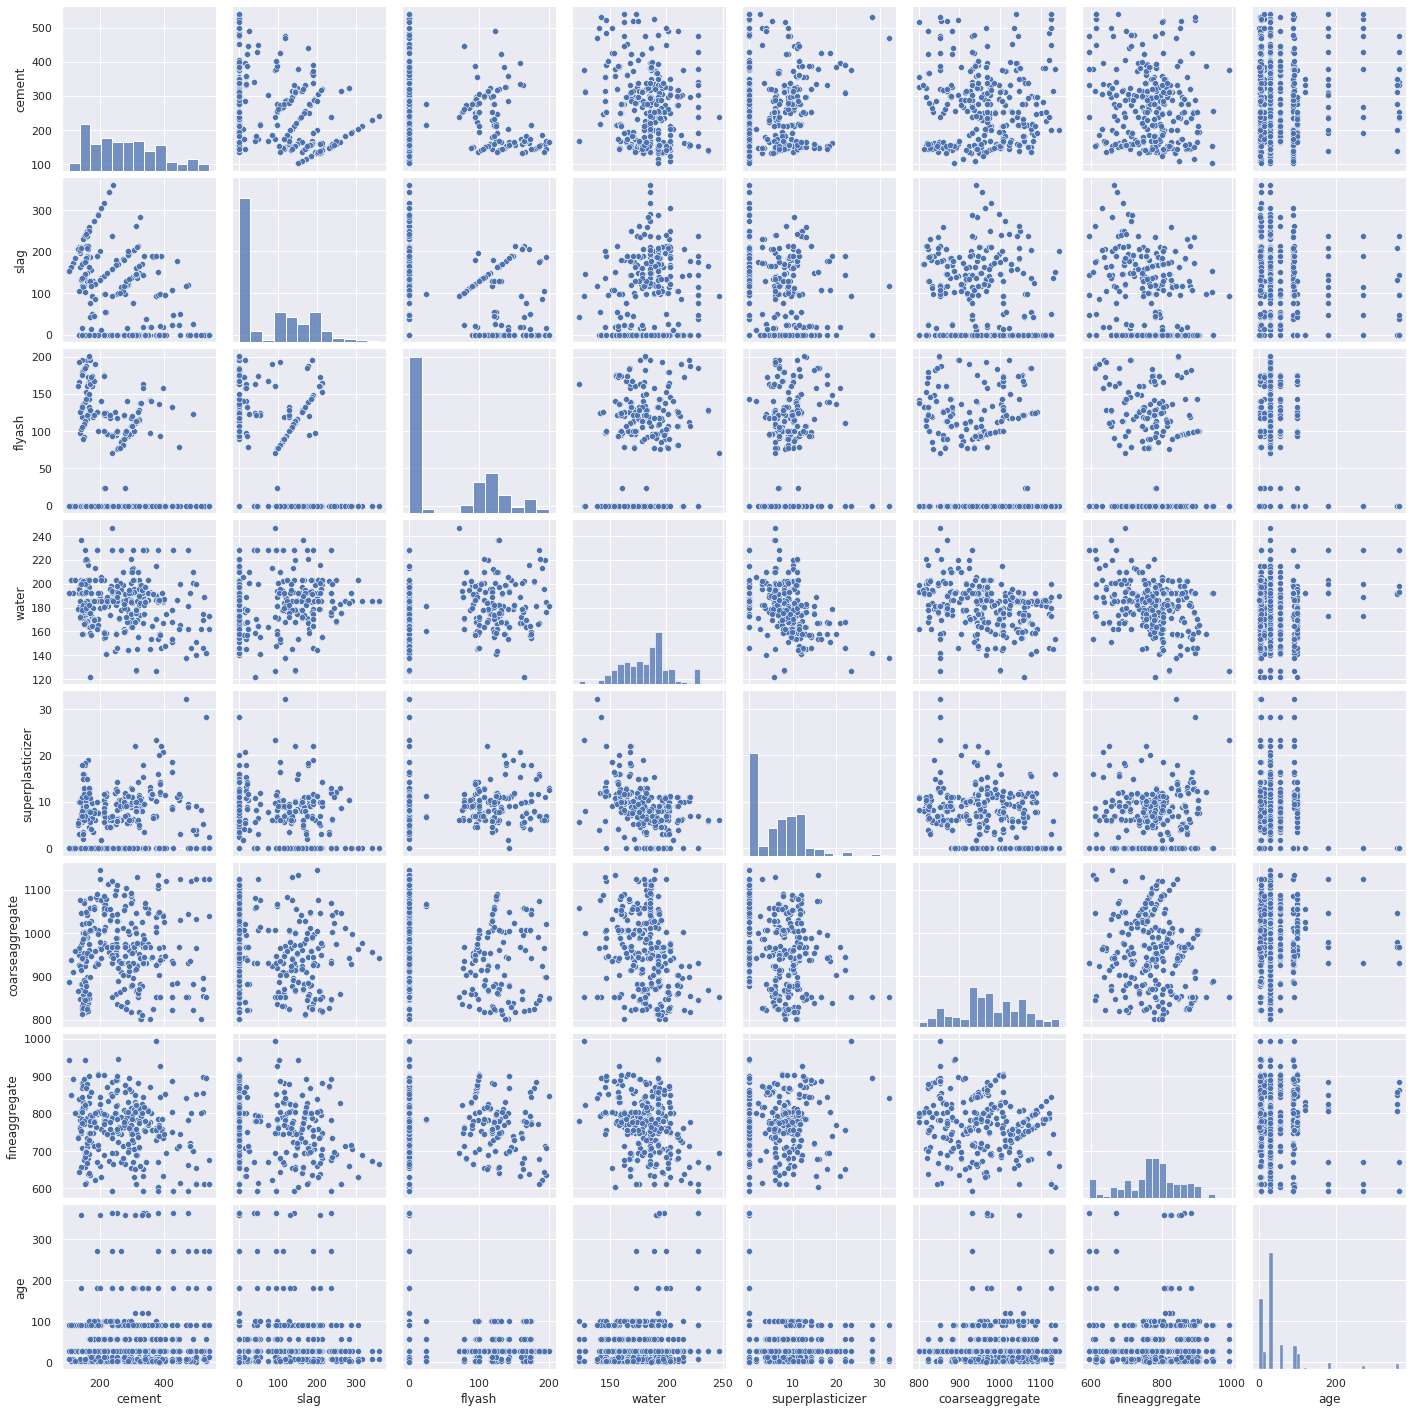

In [26]:
train_df = pd.DataFrame(X_train, columns=feature_names)
train_df['csMPa'] = Y_train
sns.pairplot(train_df, vars = feature_names)

#### 5. Train a linear regression model to predict the output/dependent variable (csMPa) based on the input variables I specified in the description of this assignment.  

In [27]:
model = linear_model.LinearRegression().fit(X_train, Y_train)

#### 6. Report (print out) the mean squared error and coefficient of determination for the test data as your model performance indicators.

In [28]:

print('Coefficients: \n', model.coef_)

Y_test_pred = model.predict(X_test)

print('Mean squared error: %.2f' % mean_squared_error(Y_test, Y_test_pred))

print('Coefficient of determination: %.2f' % r2_score(Y_test, Y_test_pred))

Coefficients: 
 [ 0.11923772  0.10881555  0.0911555  -0.14527714  0.31551104  0.02225423
  0.02248514  0.11520355]
Mean squared error: 95.62
Coefficient of determination: 0.64


In [29]:
pred_df = pd.DataFrame({'Actual': Y_test, 'Predicted':Y_test_pred})
pred_df.head()

,Actual,Predicted
747,26.06,39.161683
718,10.35,14.619856
175,79.30,61.440067
828,74.99,53.777042
713,9.69,24.668431


#### 7. Plot the predicted vs. actual csMPa values

Text(0, 0.5, 'Actual csMPa')

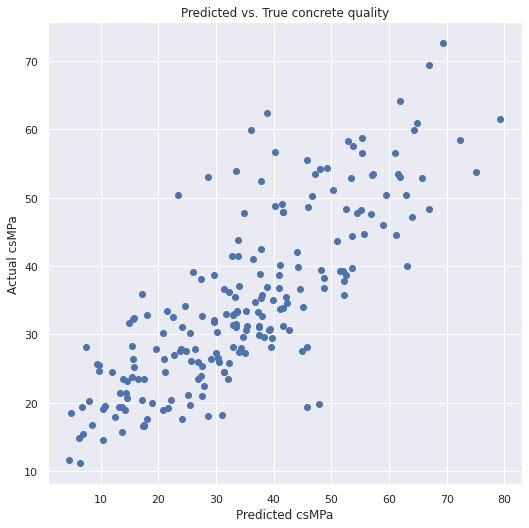

In [30]:
plt.scatter(Y_test,Y_test_pred)
plt.title('Predicted vs. True concrete quality')
plt.xlabel('Predicted csMPa')
plt.ylabel('Actual csMPa')